In [1]:
import os
import numpy as np
import pandas as pd
from scipy.interpolate import  interp1d

import pyradi.ryplot as ryplot
import pyradi.rymodtran as rymodtran
import pyradi.ryutils as ryutils

These runs were made with the desert albedo in the modtran albedo file replaced with the data in this folder.

In [6]:
def loadinter(filename,wli):
    tape7 = rymodtran.loadtape7(filename, ['FREQ', 'REF_SOL','DEPTH','SOL@OBS','GRND_RFLT','DRCT_RFLT'] )

    waven = tape7[:,0]

    # transmittance observer to ground
    tau = np.exp(-tape7[:,2])
    # tau = tau.reshape(-1,1)

    intfn = interp1d(1e4/waven,tau)
    tau = intfn(wli).reshape(-1,1)
    
    # convert from cm2 to m2
    refsoln = tape7[:,1]*1e4
    solobsn = tape7[:,3]*1e4
    grndrfltn = tape7[:,4]*1e4
    drctrfltn = tape7[:,5]*1e4

    # convert to per micron spectral density and interpolate to new vector
    (wavel, refsol) = ryutils.convertSpectralDensity(waven, refsoln, 'nl',outspecdomainFix=True,outspecdomain=wli)
    (wavel, solobs) = ryutils.convertSpectralDensity(waven, solobsn, 'nl',outspecdomainFix=True,outspecdomain=wli)
    (wavel, grndrflt) = ryutils.convertSpectralDensity(waven, grndrfltn, 'nl',outspecdomainFix=True,outspecdomain=wli)
    (wavel, drctrflt) = ryutils.convertSpectralDensity(waven, drctrfltn, 'nl',outspecdomainFix=True,outspecdomain=wli)
    
    return wavel, tau, refsol, solobs, grndrflt, drctrflt


In [50]:
wllong  = 1
wli = np.linspace(0.3, wllong,300)

# lod the three cases of modtran runa
wavelo, tauo, refsolo, solobso, grndrflto, drctrflto = loadinter('modobserver/tape7',wli)
wavels, taus, refsols, solobss, grndrflts, drctrflts = loadinter('modsun/tape7s',wli)
wavell, taul, refsoll, solobsl, grndrfltl, drctrfltl = loadinter('modlow/tape7l',wli)
wavelu, tauu, refsolu, solobsu, grndrfltu, drctrfltl = loadinter('modupper/tape7u',wli)

albedod = np.loadtxt('albedo.dat')
intfn = interp1d(albedod[:,0],albedod[:,1])
albedo = intfn(wavelo).reshape(-1,1)


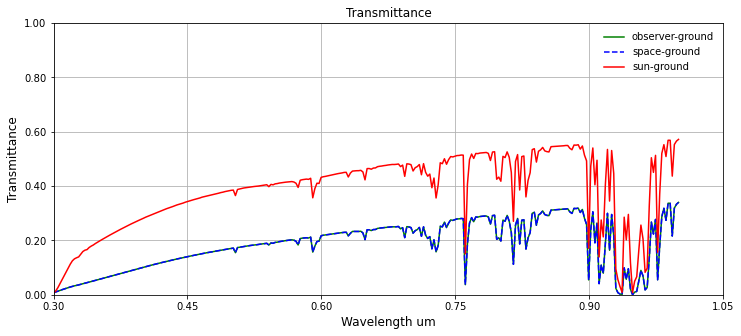

In [53]:

p = ryplot.Plotter(1, 1, 1, figsize=(12,5))
p.plot(1,wavelo,tauo,label=['observer-ground'],plotCol='g')
p.plot(1,wavelo,tauu,label=['space-ground'],linestyle=['--'],plotCol='b')
p.plot(1,wavelo,taus,'Transmittance','Wavelength um','Transmittance',plotCol='r',
       label=['sun-ground'],pltaxis=[0.3,wllong,0,1]);


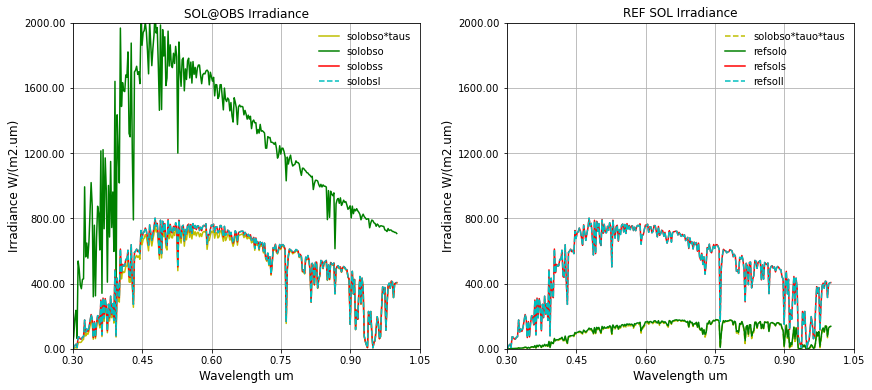

In [47]:

r = ryplot.Plotter(1, 1, 2, figsize=(14,6))

r.plot(1,wavelo,solobso*taus,label=['solobso*taus'],plotCol='y')
r.plot(1,wavelo,solobso,label=['solobso'],plotCol='g')
r.plot(1,wavelo,solobss,label=['solobss'],plotCol='r')
r.plot(1,wavelo,solobsl,label=['solobsl'],linestyle=['--'],plotCol='c',
       ptitle='SOL@OBS Irradiance',xlabel='Wavelength um',ylabel='Irradiance W/(m2.um)',
       pltaxis=[0.3,wllong,0,2000]);

r.plot(2,wavelo,solobso*tauo*taus,label=['solobso*tauo*taus'],plotCol='y',linestyle=['--'])
r.plot(2,wavelo,refsolo,label=['refsolo'],plotCol='g')
r.plot(2,wavelo,refsols,label=['refsols'],plotCol='r')
r.plot(2,wavelo,refsoll,label=['refsoll'],linestyle=['--'],plotCol='c',
       ptitle='REF SOL Irradiance',xlabel='Wavelength um',ylabel='Irradiance W/(m2.um)',
       pltaxis=[0.3,wllong,0,2000]);

# p.saveFig(os.path.join(datadir,'{}.png'.format(scenario)))


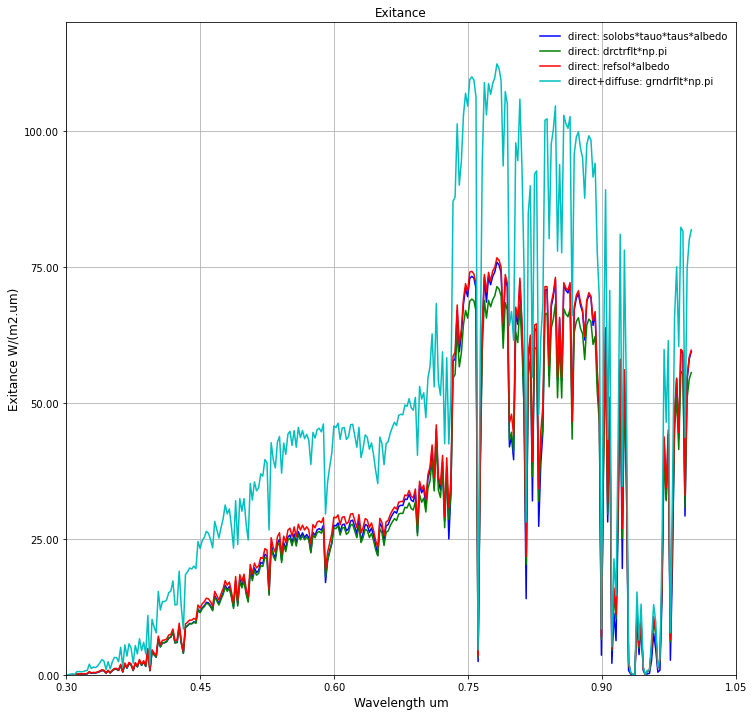

In [48]:
q = ryplot.Plotter(2, 1, 1, figsize=(12,12))
q.plot(1,wavelo,solobso*tauo*taus*albedo,label=['direct: solobs*tauo*taus*albedo'],pltaxis=[0.3,wllong,0,120])
q.plot(1,wavelo, drctrflto*np.pi,label=['direct: drctrflt*np.pi'],pltaxis=[0.3,wllong,0,120])
q.plot(1,wavelo, refsolo*albedo,label=['direct: refsol*albedo'],pltaxis=[0.3,wllong,0,120])
q.plot(1,wavelo, grndrflto*np.pi,'Exitance','Wavelength um','Exitance W/(m2.um)',
       label=['direct+diffuse: grndrflt*np.pi'],pltaxis=[0.3,wllong,0,120]);



In [4]:


# tape7 = rymodtran.loadtape7('modobserver/tape7', ['FREQ', 'REF_SOL','DEPTH','SOL@OBS','GRND_RFLT','DRCT_RFLT'] )
# tape7s = rymodtran.loadtape7('modsun/tape7s', ['FREQ', 'REF_SOL','DEPTH','SOL@OBS','GRND_RFLT','DRCT_RFLT'] )
# tape7l = rymodtran.loadtape7('modlow/tape7l', ['FREQ', 'REF_SOL','DEPTH','SOL@OBS','GRND_RFLT','DRCT_RFLT'] )


# waven = tape7[:,0]

# # transmittance observer to ground
# tauo = np.exp(-tape7[:,2])
# tauo = tauo.reshape(-1,1)

# # transmittance sun to ground
# taus = np.exp(-tape7s[:,2])
# taus = taus.reshape(-1,1)


# # TSNREF: sun-final_altitude sensor solar irradiance [real]
# # W/m2.cm-1
# refsoln = tape7[:,1]*1e4
# solobsn = tape7[:,3]*1e4
# grndrfltn = tape7[:,4]*1e4
# drctrfltn = tape7[:,5]*1e4


# # convert to microns
# (wavel, refsol) = ryutils.convertSpectralDensity(waven, refsoln, 'nl')
# (wavel, solobs) = ryutils.convertSpectralDensity(waven, solobsn, 'nl')
# (wavel, grndrflt) = ryutils.convertSpectralDensity(waven, grndrfltn, 'nl')
# (wavel, drctrflt) = ryutils.convertSpectralDensity(waven, drctrfltn, 'nl')

# intfn = interp1d(albedod[:,0],albedod[:,1])
# albedo = intfn(wavel).reshape(-1,1)

# p = ryplot.Plotter(1, 3, 1, figsize=(12,12))


# p.plot(1,wavel,tauo,label=['observer-ground'],pltaxis=[0.3,wllong,0,1])
# p.plot(1,wavel,taus,'Transmittance','Wavelength um','Transmittance',
#        label=['sun-ground'],pltaxis=[0.3,wllong,0,1])

# p.plot(2,wavel,refsol,label=['refsol: solobs*taus*tauo'],pltaxis=[0.3,wllong,0,2000])
# p.plot(2,wavel,solobs,'Irradiance','Wavelength um','Irradiance W/(m2.um)',
#        label=['solobs: Extra-terrestrial'],pltaxis=[0.3,wllong,0,2000])

# p.plot(3,wavel,solobs*tauo*taus*albedo,label=['direct: solobs*tauo*taus*albedo'],pltaxis=[0.3,wllong,0,120])
# p.plot(3,wavel, drctrflt*np.pi,label=['direct: drctrflt*np.pi'],pltaxis=[0.3,wllong,0,120])
# p.plot(3,wavel, refsol*albedo,label=['direct: refsol*albedo'],pltaxis=[0.3,wllong,0,120])
# p.plot(3,wavel, grndrflt*np.pi,'Exitance','Wavelength um','Exitance W/(m2.um)',
#        label=['direct+diffuse: grndrflt*np.pi'],pltaxis=[0.3,wllong,0,120]);

# # p.saveFig(os.path.join(datadir,'{}.png'.format(scenario)))

